In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv('s&p_500_kaggle/sp500_index.csv')
df.head()

,Date,S&P500
0,14-11-2013,1790.62
1,15-11-2013,1798.18
2,18-11-2013,1791.53
3,19-11-2013,1787.87
4,20-11-2013,1781.37


In [42]:
df.shape

(2516, 2)

In [59]:
def create_images_df(data, window_size, step_size):

    num_samples = len(data) - window_size + 1
    images_df = pd.DataFrame(columns=['Image_Path', 'Start_Date', 'End_Date', 'Prediction'])
    
    for i in range(0, num_samples, step_size):
        subset = data.iloc[i:i+window_size]
        start_date = subset['Date'].iloc[0]
        end_date = subset['Date'].iloc[-1]
        prediction = 'High' if subset['S&P500'].iloc[-1] < df.iloc[i+window_size]['S&P500'] else 'Low'
        
        # Normalize the 'S&P500' values for the current subset
        scaler = MinMaxScaler()
        subset_normalized = scaler.fit_transform(subset[['S&P500']])
                
        # Plotting stock prices
        plt.figure(figsize=(8, 4))  # Modify the figure size as needed
        plt.plot( subset_normalized)
        plt.axis('off')  # Turn off axis
        plt.tight_layout()
        
        # Save the plot as an image
        image_path = f'img_data/image_{i}.png'  # Change the naming convention as needed
        plt.savefig(image_path)
        plt.close()
        
        images_df = images_df.append({
            'Image_Path': image_path,
            'Start_Date': start_date,
            'End_Date': end_date,
            'Prediction': prediction
        }, ignore_index=True)

            
    return images_df



In [60]:
window_size = 50
step_size = 10
# Create images using the function
image_df = create_images_df(df, window_size, step_size)

In [61]:
image_df

,Image_Path,Start_Date,End_Date,Prediction
0,img_data/image_0.png,14-11-2013,28-01-2014,Low
1,img_data/image_10.png,29-11-2013,11-02-2014,Low
2,img_data/image_20.png,13-12-2013,26-02-2014,High
3,img_data/image_30.png,30-12-2013,12-03-2014,Low
4,img_data/image_40.png,14-01-2014,26-03-2014,Low
...,...,...,...,...
242,img_data/image_2420.png,29-06-2023,08-09-2023,High
243,img_data/image_2430.png,14-07-2023,22-09-2023,High
244,img_data/image_2440.png,28-07-2023,06-10-2023,High
245,img_data/image_2450.png,11-08-2023,20-10-2023,Low


In [63]:
image_df.to_csv('image_df.csv',index=False)

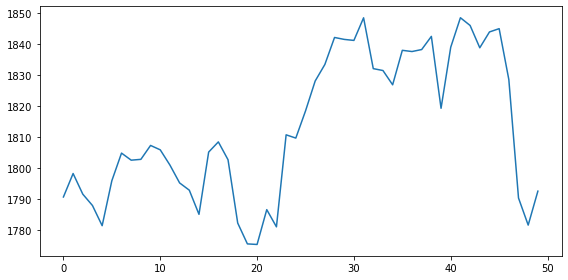

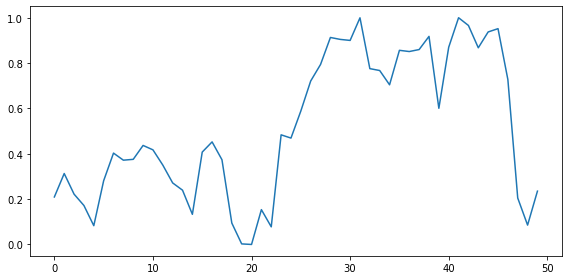

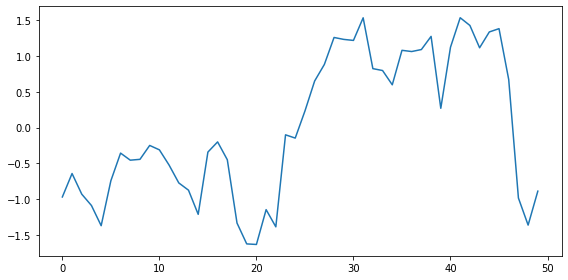

In [6]:
i=0
subset = df.iloc[i:i+50]

# Plotting stock prices
plt.figure(figsize=(8, 4))  # Modify the figure size as needed
plt.plot( subset[['S&P500']])
#plt.axis('off')  # Turn off axis
plt.tight_layout()

# Normalize the 'S&P500' values for the current subset
scaler = MinMaxScaler()
subset_normalized = scaler.fit_transform(subset[['S&P500']])
        
# Plotting stock prices
plt.figure(figsize=(8, 4))  # Modify the figure size as needed
plt.plot( subset_normalized)
#plt.axis('off')  # Turn off axis
plt.tight_layout()


scaler_s = StandardScaler()
subset_s = scaler_s.fit_transform(subset[['S&P500']])
        
# Plotting stock prices
plt.figure(figsize=(8, 4))  # Modify the figure size as needed
plt.plot( subset_s)
#plt.axis('off')  # Turn off axis
plt.tight_layout()